Randow Walk
---
## n-step TD Method

<img style="float" src="rw-game.png" alt="drawing" width="700"/>

In this MRP, all episodes start in the center state, C, then proceed either left or right by one state on each step, with equal probability. Episodes terminate either on the extreme left or the extreme right. When an episode terminates on the right, a reward of +1 occurs; all other rewards are zero.

<img style="float" src="n-step.png" alt="drawing" width="700"/>

In [1]:
import numpy as np

In [24]:
# 19 states (not including the ending state)
NUM_STATES = 19
START = 9
END_0 = 0
END_1 = 20

In [79]:
class RandomWalk:
    
    def __init__(self, n, start=START, end=False, lr=0.1, gamma=1, debug=False):
        self.actions = ["left", "right"]
        self.state = start  # current state
        self.end = end
        self.n = n
        self.lr = lr
        self.gamma = gamma
        self.state_actions = []
        self.debug = debug
        # init q estimates
        self.Q_values = {}
        for i in range(NUM_STATES+2):  
            self.Q_values[i] = {}
            for a in self.actions:
                if i in [END_0, END_1]:
                    # explicitly set end state values
                    if i == END_0:
                        self.Q_values[i][a] = -1
                    else:
                        self.Q_values[i][a] = 1  
                else:
                    self.Q_values[i][a] = 0
                
    def chooseAction(self):    
        action = np.random.choice(self.actions)
        return action 
    
    def takeAction(self, action):
        new_state = self.state
        if not self.end:
            if action == "left":
                new_state = self.state-1
            else:
                new_state = self.state+1
            
            if new_state in [END_0, END_1]:
                self.end = True
        self.state = new_state
        return self.state
    
    def giveReward(self):
        if self.state == END_0:
            return -1
        if self.state == END_1:
            return 1
        # other states
        return 0
    
    def reset(self):
        self.state = START
        self.end = False
           
    def play(self, rounds=100):
        for _ in range(rounds):
            self.reset()
            t = 0
            T = np.inf
            action = self.chooseAction()
            
            actions = [action]
            states = [self.state]
            rewards = [0]
            while True:
                if t < T:
                    state = self.takeAction(action)  # next state
                    reward = self.giveReward()  # next state-reward
                    
                    states.append(state)
                    rewards.append(reward)
                    
                    if self.end:
                        if self.debug:
                            print("End at state {} | number of states {}".format(state, len(states)))
                        T = t+1
                    else:
                        action = self.chooseAction()
                        actions.append(action)  # next action
                # state tau being updated
                tau = t - self.n + 1
                if tau >= 0:
                    G = 0
                    for i in range(tau+1, min(tau+self.n+1, T+1)):
                        G += np.power(self.gamma, i-tau-1)*rewards[i]
                    if tau+self.n < T:
                        state_action = (states[tau+self.n], actions[tau+self.n])
                        G += np.power(self.gamma, self.n)*self.Q_values[state_action[0]][state_action[1]]
                    # update Q values
                    state_action = (states[tau], actions[tau])
                    self.Q_values[state_action[0]][state_action[1]] += self.lr*(G-self.Q_values[state_action[0]][state_action[1]])
                
                if tau == T-1:
                    break
                
                t += 1

In [80]:
rw = RandomWalk(n=3, debug=True)
rw.play(100)

End at state 0 | number of states 128
End at state 20 | number of states 54
End at state 0 | number of states 62
End at state 20 | number of states 78
End at state 20 | number of states 120
End at state 20 | number of states 162
End at state 20 | number of states 28
End at state 20 | number of states 96
End at state 20 | number of states 64
End at state 20 | number of states 22
End at state 20 | number of states 58
End at state 0 | number of states 20
End at state 0 | number of states 112
End at state 20 | number of states 178
End at state 20 | number of states 34
End at state 20 | number of states 94
End at state 20 | number of states 194
End at state 20 | number of states 28
End at state 0 | number of states 32
End at state 20 | number of states 28
End at state 20 | number of states 32
End at state 20 | number of states 196
End at state 0 | number of states 22
End at state 0 | number of states 94
End at state 20 | number of states 270
End at state 0 | number of states 70
End at state

In [81]:
rw.Q_values

{0: {'left': -1, 'right': -1},
 1: {'left': -0.9936373145588641, 'right': -0.6123810215862159},
 2: {'left': -0.8392639995764508, 'right': -0.5850253270890091},
 3: {'left': -0.7775947999495476, 'right': -0.43751674286580655},
 4: {'left': -0.6350368351260016, 'right': -0.3913969471231499},
 5: {'left': -0.5208547542814366, 'right': -0.26671115028058673},
 6: {'left': -0.33496288325959034, 'right': -0.26519281995470595},
 7: {'left': -0.3294325408271672, 'right': -0.1591379489070186},
 8: {'left': -0.21027443783034355, 'right': -0.07471736024551187},
 9: {'left': -0.14863075754947244, 'right': 0.07759996622191677},
 10: {'left': -0.07275436059378539, 'right': 0.09562596254321507},
 11: {'left': -0.0698675296380922, 'right': 0.20716635348566195},
 12: {'left': 0.06887198644715165, 'right': 0.3895484529272696},
 13: {'left': 0.22819408930618723, 'right': 0.44686596899342845},
 14: {'left': 0.31824587239368246, 'right': 0.591062882938997},
 15: {'left': 0.49634424181210773, 'right': 0.645

### Compute (n, lr) -> state-error

In [84]:
actual_state_values = np.arange(-20, 22, 2) / 20.0

lr_range = np.linspace(0, 1, 6)
n_range = np.power(2, range(10))
episodes = 100

In [105]:
sq_errors = {}

for n in n_range:
    ers = []
    for lr in lr_range:
        print("running estimation for lr={} and step={}".format(lr, n))
        rw = RandomWalk(n=n, lr=lr, debug=False)
        rw.play(episodes)
        # V(s) = 0.5*Q(S, 'left') + 0.5*Q(S, 'right')
        estimate_state_values = [np.mean(list(v.values())) for v in rw.Q_values.values()]
        
        ers.append(np.mean([er**2 for er in actual_state_values - np.array(estimate_state_values)]))
    sq_errors[n] = ers

running estimation for lr=0.0 and step=1
running estimation for lr=0.2 and step=1
running estimation for lr=0.4 and step=1
running estimation for lr=0.6000000000000001 and step=1
running estimation for lr=0.8 and step=1
running estimation for lr=1.0 and step=1
running estimation for lr=0.0 and step=2
running estimation for lr=0.2 and step=2
running estimation for lr=0.4 and step=2
running estimation for lr=0.6000000000000001 and step=2
running estimation for lr=0.8 and step=2
running estimation for lr=1.0 and step=2
running estimation for lr=0.0 and step=4
running estimation for lr=0.2 and step=4
running estimation for lr=0.4 and step=4
running estimation for lr=0.6000000000000001 and step=4
running estimation for lr=0.8 and step=4
running estimation for lr=1.0 and step=4
running estimation for lr=0.0 and step=8
running estimation for lr=0.2 and step=8
running estimation for lr=0.4 and step=8
running estimation for lr=0.6000000000000001 and step=8
running estimation for lr=0.8 and step

### Visualise Error

In [101]:
import matplotlib.pyplot as plt

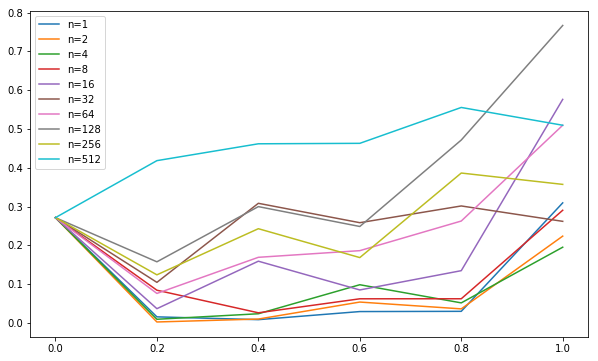

In [108]:
plt.figure(figsize=[10, 6])

for n in n_range:
    plt.plot(lr_range, sq_errors[n], label="n={}".format(n))
plt.legend()